In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [3]:
path = '../../../Data/2026/260113_Vanillin_gas_particle_UV/'
SMPS = import_SMPS(f'{path}SMPS/', '', 0)
save_path = 'Figures/260113_vanillin(aq)_RH20/'
timestamps = [['2026-01-13 13:21', '2026-01-13 18:25']]

for key in SMPS.keys():
    SMPS[key].rename(columns = {SMPS[key].keys()[38]:'Total concentration'}, inplace = True)
AMS = import_data(f'{path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
for key in AMS.keys():
    if 'PToF' not in key:            
        AMS[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'Ratio_H_C', 'Ratio_O_C', 
                            'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH', 'f43', 'f44', 'Time']
PTRMS = import_PTRMS(f'{path}PTRMS/', '')

(0.0, 3.25)

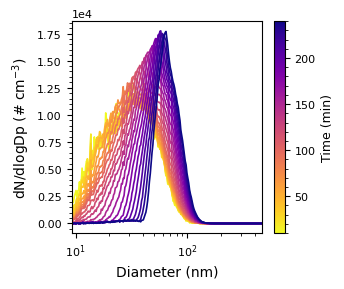

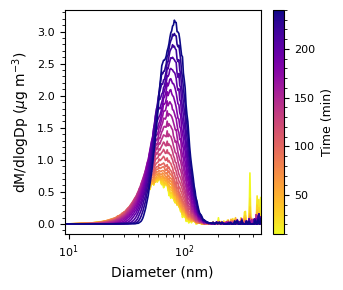

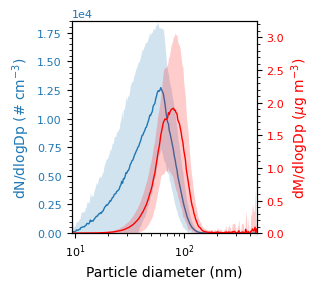

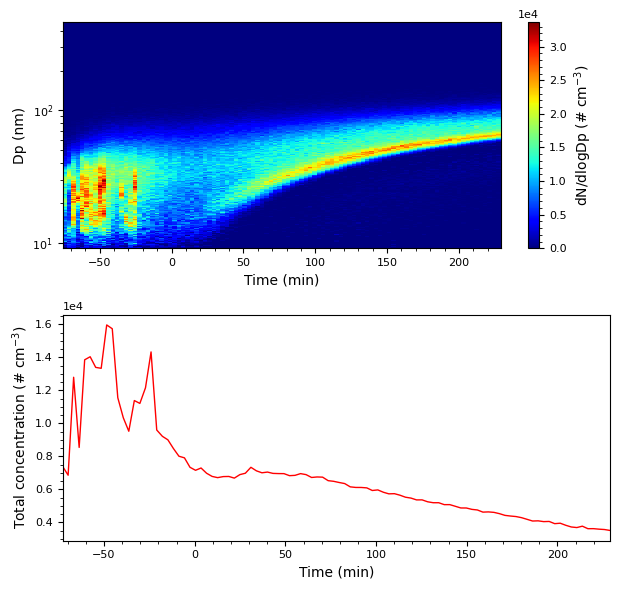

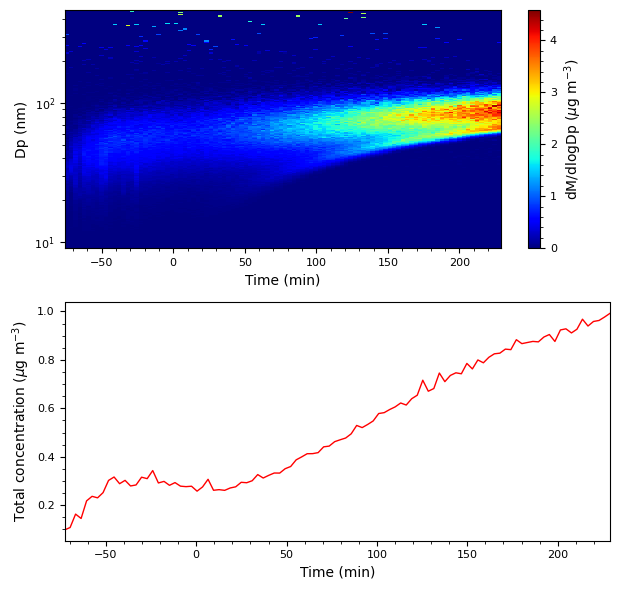

In [3]:
SMPS_keys = [['260113-vanillin_number'], ['260113-vanillin_mass']]
ax, ax_2 = plot_SMPS(SMPS, SMPS_keys, SMPS['260113-vanillin_mass'].keys()[42:-1], 9.07, 'number and mass', timestamps, 10, 
                     'Total concentration', '2026-01-13 14:36', 1, 1, save_path)
ax[0].set_ylim(0, 1.85*10**4)
ax_2[0].set_ylim(0, 3.25)

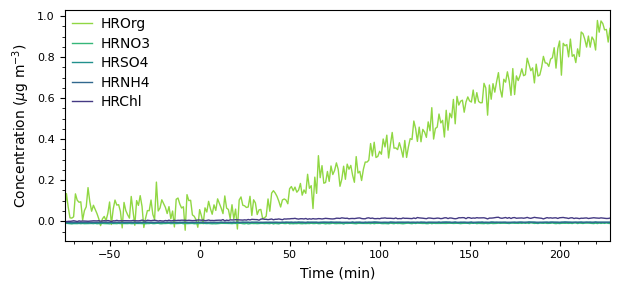

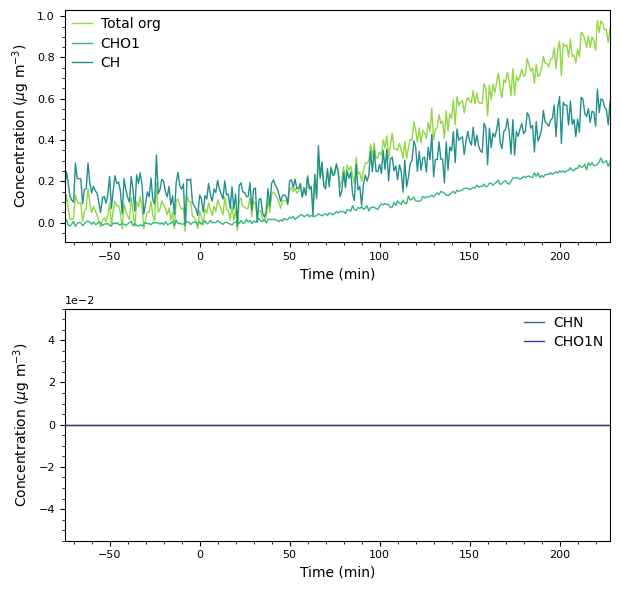

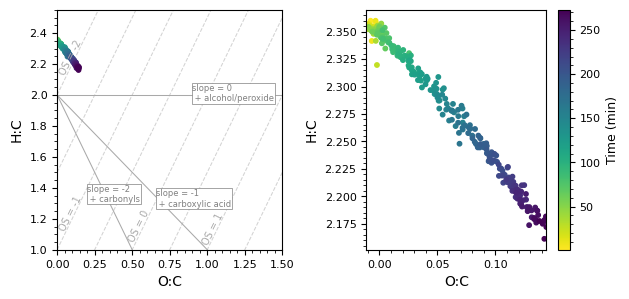

In [4]:
bg_timestamps = ['2026-01-13 12:51', '2026-01-13 13:07']
plot_AMS(AMS['260113_AMS_vanillin+UV_TS'], None, '2026-01-13 14:36', timestamps[0], bg_timestamps, 1, save_path)